### Introduction
In this part we will start with the SVM algorithm for Classification : We are using the “Social Network Ads” dataset on kaggle here is the link of this dataset [Social Network Ads.](https://www.kaggle.com/rakeshrau/social-network-ads)

#### Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#### Importing the dataset

In [12]:
df = pd.read_csv('sn_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### Features and labels

In [15]:
x = df.iloc[:,[2,3]].values # select column 2 and 3 for features
y = df.iloc[:,4].values # for target

#### Splitting the dataset

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=3)

#### Feature Scaling

In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.fit_transform(x_test)

#### Fitting classifier to the Training set

In [18]:
classifier = SVC(random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

#### Predicting the Test set results

In [20]:
y_pred = classifier.predict(x_test)

#### Making the confusion Matrix

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[58,  7],
       [ 5, 30]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


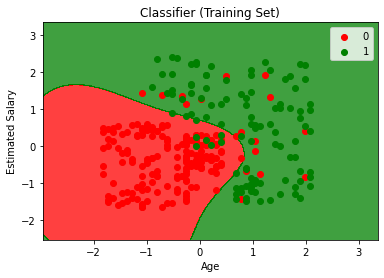

In [31]:
x_set, y_set = x_train, y_train
x1,x2 = np.meshgrid(np.arange(start = x_test[:,0].min()-1, stop=x_test[:,0].max()+1,step=0.01),
                    np.arange(start = x_test[:,1].min()-1, stop = x_test[:,0].max()+1, step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set==j,1],
    c = ListedColormap(('red','green'))(i),label=j)
plt.title('Classifier (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The objecttive of our classifier is to fit the training data and return the best fit hyperplane that divide our data